# <span style= "color:purple">Etude de marché - L'envol des poulets !</span>

![banniere](assets/banniere.jpeg)

## <span style="color:orange">Sommaire</span>

1. [Test d'adéquation - loi normale](#ade)    
2. [Test de comparaison de 2 Clusters dans le cas gaussien](#comp)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
plt.style.use('seaborn-whitegrid')

## <span style="color:orange" id="ade">Test d'adéquation - loi normale</span>

Nous avons utilisé des variables pour clusteriser nos données. Dans un premier temps :
- L'évolution de la population 2015 - 2017,
- La disponibilité alimentaire,
- Le ratio protéines animales sur protéines totales.

Dans le second clustering :
- L'évolution du PIB
- L'évolution de la consommation de volailles
- Les élevages de volailles
- Les imports de viandes de volailles.

**Nous allons à présent vérifier l'adéquation de ces variables à la loi normale.** Nous allons commencer par visualiser la distribution des individus sur ces variables :

In [2]:
#import des données :
df_select_export = pd.read_csv("exports/dataset_etendu.csv", sep=",", decimal=".", header=0)

In [3]:
df_select_export = df_select_export[["Zone","Evolution population (%)","Dispo. Alim. (Kcal/personne)","Prot. Animales/Prot. Totales dispo (%)",
             "Croissance annuelle PIB US$ (%)","Imports viande volaille / hbts (kg/personne/an)",
             "Evo conso volailles 2015-2017 (%)","Elevage volailles / hbts (kg/personne/an)"]]
df_select_export.head()

,Zone,Evolution population (%),Dispo. Alim. (Kcal/personne),Prot. Animales/Prot. Totales dispo (%),Croissance annuelle PIB US$ (%),Imports viande volaille / hbts (kg/personne/an),Evo conso volailles 2015-2017 (%),Elevage volailles / hbts (kg/personne/an)
0,Afghanistan,5.470,730000.0,19.505,6.327787,0.798984,-19.895,0.758153
1,Angola,6.930,828550.0,30.456,20.766647,9.290075,-19.939,0.901204
2,Bangladesh,2.195,947540.0,19.841,11.491529,5.003144,3.448,1.217569
3,Bolivie (État plurinational de),2.973,859210.0,45.370,10.511101,0.089343,2.244,45.037035
4,Botswana,3.978,854100.0,40.580,11.242991,1.360495,11.513,2.086092


In [4]:
liste_var = ["Croissance annuelle PIB US$ (%)","Imports viande volaille / hbts (kg/personne/an)",
             "Evo conso volailles 2015-2017 (%)","Elevage volailles / hbts (kg/personne/an)"]

In [5]:
def var_hist(var, i):
    subset = df_select_export[var]
    n_dataset = len(df_select_export)
    xbar = np.mean(df_select_export[var]) # Moyenne
    sprime = np.std(df_select_export[var], ddof=1) # Ecart-type
    sprime2 = np.var(df_select_export[var], ddof=1) #Variance non biaisée
    ax = fig.add_subplot(i)
    ax.hist(subset, density=True)
    ax.axvline(xbar, color='r', linewidth=2, label="Moyenne empirique")
    bins = np.arange(df_select_export[var].min(),df_select_export[var].max(),1)
    y = scs.norm.pdf(bins, xbar, sprime)
    ax.plot(bins, y, '--', label="Densité normale")
    ax.legend()
    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel('Densité', fontsize=12)
    ax.set_title('Distribution de '+str(var), fontsize=18)

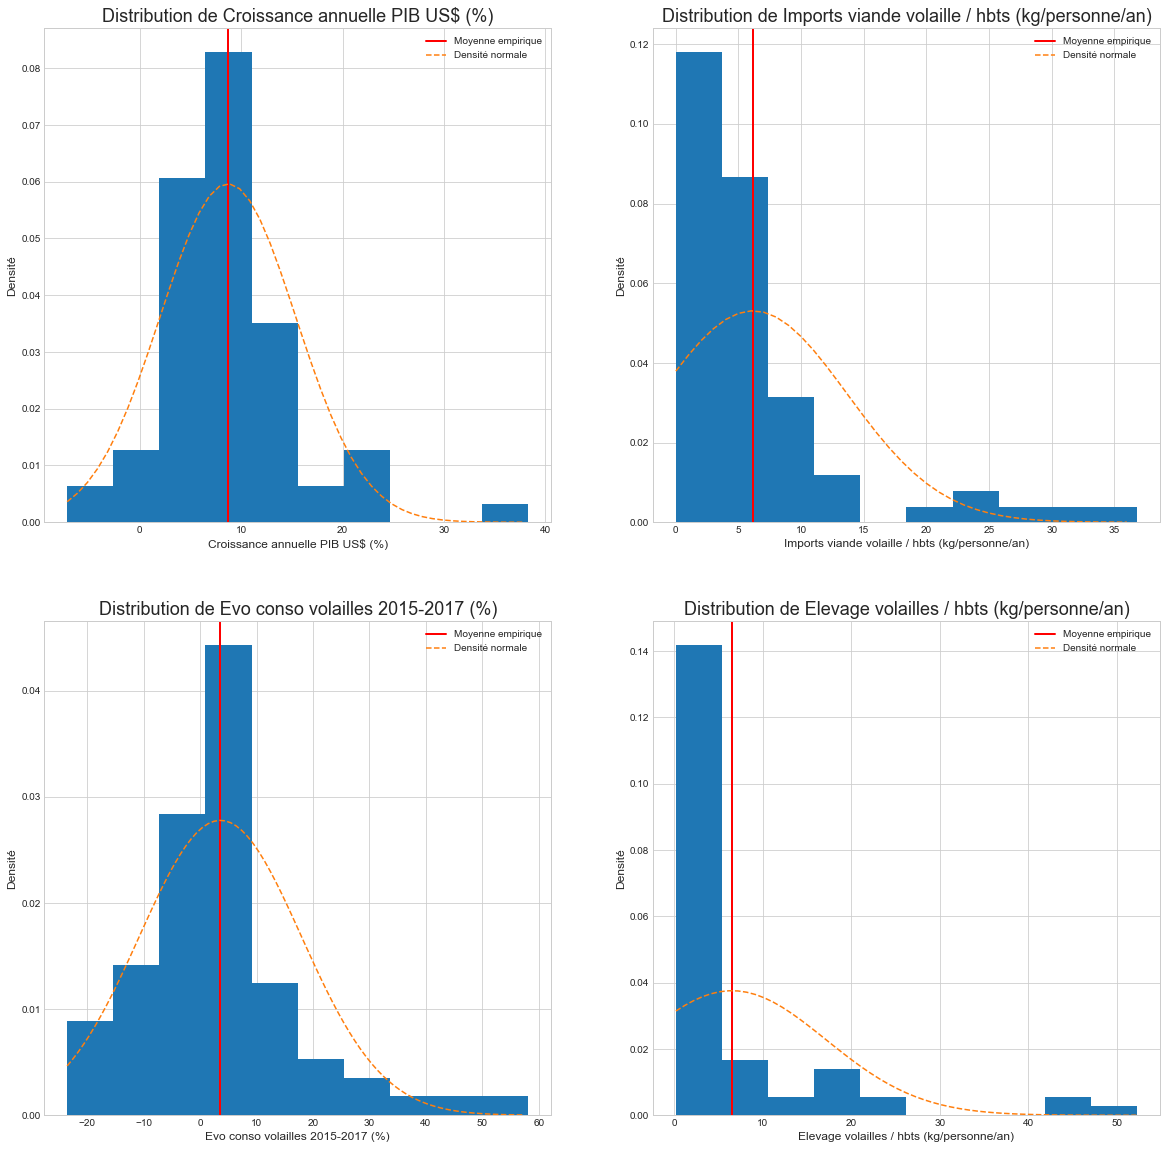

In [6]:
fig = plt.figure(figsize=(20,20),constrained_layout=False)
i = 221
for var in liste_var :
    var_hist(var, i)
    i+=1

On remarque déjà sur ces histogrammes que certaines distributions de variables ont tendance à suivre une loi gaussienne, notamment la croissance du PIB et l'évolution des consommations de volailles. L'échantillon étant de taille limité, nous allons déjà réaliser un **test de Shapiro-Wilk** pour tester la normalité :

In [7]:
for var in liste_var :
    print(var, ": Pvalue = ", scs.shapiro(df_select_export[var])[1])

Croissance annuelle PIB US$ (%) : Pvalue =  0.00019371438247617334
Imports viande volaille / hbts (kg/personne/an) : Pvalue =  5.097834376854848e-10
Evo conso volailles 2015-2017 (%) : Pvalue =  0.00020008468709420413
Elevage volailles / hbts (kg/personne/an) : Pvalue =  9.502352247073298e-13


**Les Pvalue du Test de Shapiro-Wilk sur ces 4 variables permettent de rejetter l’hypothèse de normalité au niveau de test 5%**.

Pour confirmer ce résultat, nous allons réaliser l'analyse du **test de Kolmogorov Smirnov** :

In [8]:
for var in liste_var :
    print(var,":",scs.ks_2samp(df_select_export[var],list(np.random.normal(np.mean(df_select_export[var]), np.std(df_select_export[var]), 1000))))

Croissance annuelle PIB US$ (%) : Ks_2sampResult(statistic=0.13908695652173914, pvalue=0.14930219313082516)
Imports viande volaille / hbts (kg/personne/an) : Ks_2sampResult(statistic=0.22365217391304348, pvalue=0.002562881937632544)
Evo conso volailles 2015-2017 (%) : Ks_2sampResult(statistic=0.12960869565217392, pvalue=0.20882033195378902)
Elevage volailles / hbts (kg/personne/an) : Ks_2sampResult(statistic=0.2901449275362319, pvalue=2.646527745486793e-05)


**Les Pvalue du Test de Kolmogorov Smirnov ne permettent plus de rejetter l'hypothèse de normalité au niveau de test de 5% pour les variables Croissance du PIB et Evo des conso de volailles.**

Nous allons tester les 3 autres variables utilisées dans le premier clustering.

In [9]:
liste_var_2 = ["Evolution population (%)","Dispo. Alim. (Kcal/personne)","Prot. Animales/Prot. Totales dispo (%)"]

C:\Users\OpenClassrooms\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


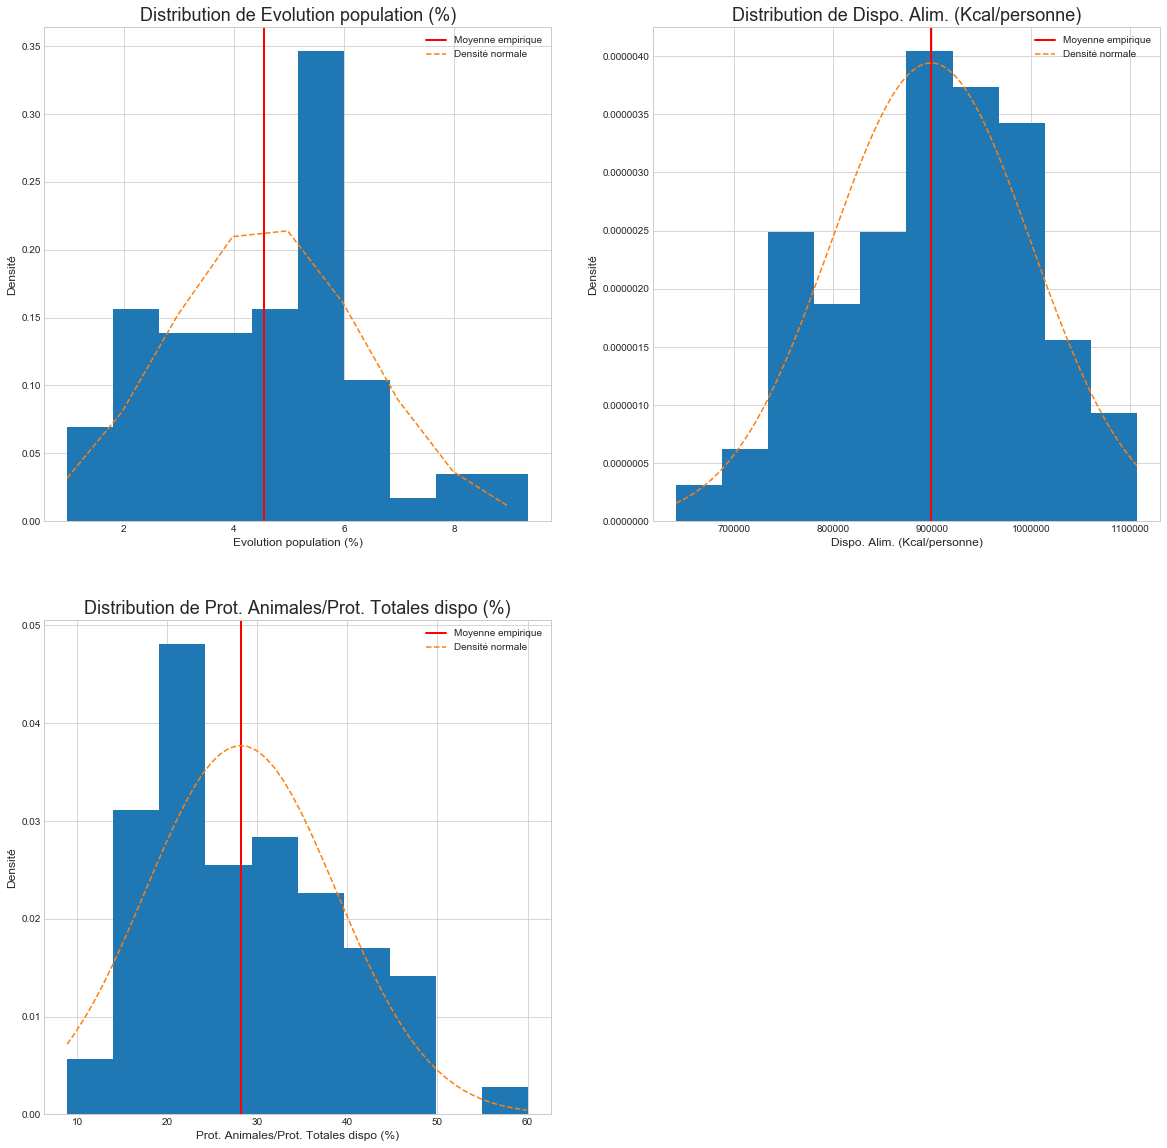

In [10]:
fig = plt.figure(figsize=(20,20),constrained_layout=False)
i = 221
for var2 in liste_var_2 :
    var_hist(var2, i)
    i+=1

In [11]:
# Test de Shapiro
for var2 in liste_var_2 :
    print(var2, ": Pvalue = ", scs.shapiro(df_select_export[var2])[1])

Evolution population (%) : Pvalue =  0.06077402085065842
Dispo. Alim. (Kcal/personne) : Pvalue =  0.6892567276954651
Prot. Animales/Prot. Totales dispo (%) : Pvalue =  0.022480281069874763


In [12]:
# Test de Kolmogorov Smirnov
for var2 in liste_var_2 :
    print(var2,":",scs.ks_2samp(df_select_export[var2],list(np.random.normal(np.mean(df_select_export[var2]), np.std(df_select_export[var2]), 1000))))

Evolution population (%) : Ks_2sampResult(statistic=0.1252463768115942, pvalue=0.2410561823459506)
Dispo. Alim. (Kcal/personne) : Ks_2sampResult(statistic=0.07089855072463769, pvalue=0.8769804610195864)
Prot. Animales/Prot. Totales dispo (%) : Ks_2sampResult(statistic=0.1102608695652174, pvalue=0.3826999650908245)


Pour les 2 tests cette fois, **les Pvalue ne permettent pas de rejeter l'hypothèse de normalité sur la variable Disponibilité alimentaire en Kcal/personne**.
Nous allons donc utiliser cette variable pour réaliser les tests de comparaison de 2 populations dans le cas gaussien.

## <span style="color:orange" id="comp">Test de comparaison de 2 Clusters dans le cas gaussien</span>

In [13]:
#import des données :
df_select_clusters = pd.read_csv("datas/pays_clustering_etendu.csv", sep=",", decimal=".", header=0)

In [14]:
df_select_clusters.head()

,Zone,Code zone,Année,Population,Evolution population (%),Dispo. Alim. (Kcal/personne),Dispo. Prot. (g/personne),Prot. Animales/Prot. Totales dispo (%),Cluster,Clusterkm,...,Evo conso volailles 2015-2017 (%),Elevage volailles / hbts (kg/personne/an),Cluster6,H1,H2,Clusterkm5,F1,F2,F3,F4
0,Afghanistan,2,2017,36296113.0,5.470,730000.0,19742.85,19.505,1,0,...,-19.895,0.758153,1,False,False,1,-2.051085,-1.095665,-1.198073,0.872504
1,Angola,7,2017,29816766.0,6.930,828550.0,19750.15,30.456,1,0,...,-19.939,0.901204,2,True,False,1,-1.122326,-1.387980,0.357222,-2.452893
2,Bangladesh,16,2017,159685424.0,2.195,947540.0,22002.20,19.841,2,3,...,3.448,1.217569,3,True,False,2,-0.771304,1.447310,0.056104,0.044144
3,Bolivie (État plurinational de),19,2017,11192855.0,2.973,859210.0,24987.90,45.370,2,3,...,2.244,45.037035,5,False,False,0,3.737959,1.210391,-2.077293,-1.474533
4,Botswana,20,2017,2205080.0,3.978,854100.0,23790.70,40.580,2,3,...,11.513,2.086092,3,True,False,2,-0.025701,0.932234,0.072636,-0.271913


In [15]:
df_select_clusters = df_select_clusters[["Zone","Clusterkm5","Dispo. Alim. (Kcal/personne)"]]
df_select_clusters.sample(10)

,Zone,Clusterkm5,Dispo. Alim. (Kcal/personne)
19,Ghana,2,1107045.0
39,Mauritanie,2,1037330.0
1,Angola,1,828550.0
64,Burkina Faso,2,992800.0
16,Djibouti,2,978200.0
20,Guatemala,0,930385.0
10,Sri Lanka,2,953745.0
29,Kenya,1,775260.0
51,Timor-Leste,1,781100.0
5,Belize,0,984770.0


Nous allons choisir 2 Clusters pour le test de comparaison sur la variable Dispo. Alim. (Kcal/personne) : **Les groupes 1 et 2 qui ont des effectifs proches**.

In [16]:
df_select_clusters = df_select_clusters[df_select_clusters["Clusterkm5"].isin([1,2])]
df_select_clusters_1 = df_select_clusters[df_select_clusters["Clusterkm5"] == 1]
df_select_clusters_2 = df_select_clusters[df_select_clusters["Clusterkm5"] == 2]

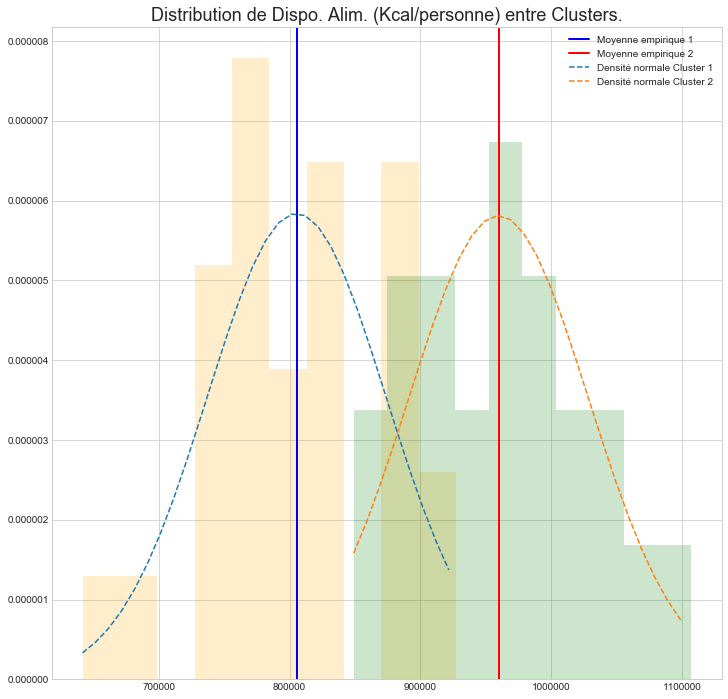

In [17]:
var = "Dispo. Alim. (Kcal/personne)"
xbar_1 = np.mean(df_select_clusters_1[var]) # Moyenne
sprime_1 = np.std(df_select_clusters_1[var], ddof=1) # Ecart-type
sprime2_1 = np.var(df_select_clusters_1[var], ddof=1) #Variance non biaisée
xbar_2 = np.mean(df_select_clusters_2[var]) # Moyenne
sprime_2 = np.std(df_select_clusters_2[var], ddof=1) # Ecart-type
sprime2_2 = np.var(df_select_clusters_2[var], ddof=1) #Variance non biaisée

fig = plt.figure(figsize=(12,12))
plt.hist(df_select_clusters_1[var], density=True, alpha=0.2, color="orange")
plt.hist(df_select_clusters_2[var], density=True, alpha=0.2, color="green")
plt.axvline(xbar_1, color='b', linewidth=2, label="Moyenne empirique 1")
plt.axvline(xbar_2, color='r', linewidth=2, label="Moyenne empirique 2")
bins_1 = np.arange(df_select_clusters_1[var].min(),df_select_clusters_1[var].max(),10000)
y_1 = scs.norm.pdf(bins_1, xbar_1, sprime_1)
plt.plot(bins_1, y_1, '--', label="Densité normale Cluster 1")
bins_2 = np.arange(df_select_clusters_2[var].min(),df_select_clusters_2[var].max(),10000)
y_2 = scs.norm.pdf(bins_2, xbar_2, sprime_2)
plt.plot(bins_2, y_2, '--', label="Densité normale Cluster 2")

plt.legend()
plt.title('Distribution de '+str(var)+' entre Clusters.', fontsize=18)

plt.show()

Nous allons dans un premier temps **tester l'égalité des variances** :

In [18]:
scs.bartlett(df_select_clusters_1[var],df_select_clusters_2[var])

BartlettResult(statistic=0.0004836028072000279, pvalue=0.9824551578654914)

**La Pvalue valant 0.98, on ne rejette donc pas l’égalité des variances au niveau de test 5%.**

Testons ensuite l'**égalité des moyennes** :

In [19]:
scs.ttest_ind(df_select_clusters_1[var],df_select_clusters_2[var], equal_var=True)

Ttest_indResult(statistic=-7.945656879447758, pvalue=2.660628020781466e-10)

**On obtient une Pvalue égale à environ 2.66×10−10. On constate donc que l’hypothèse d’égalité des moyennes de disponibilité alimentaire en Kcal/personne entre les différents Clusters est largement rejetée à un niveau de test de 5%.**